In [1]:
import pandas as pd
df = pd.read_csv("/Users/shahmdmesbahulislam/Documents/code/Data_Science_nd_ML/Machine Learning/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [3]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [8]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn import tree

In [10]:
model = tree.DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size = 0.2)

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test,y_test)

0.75

In [20]:
model.predict([[2,2,1]])

/Users/shahmdmesbahulislam/opt/anaconda3/envs/DS_ML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[1, 1],
       [0, 2]])

Text(70.72222222222221, 0.5, 'True Value')

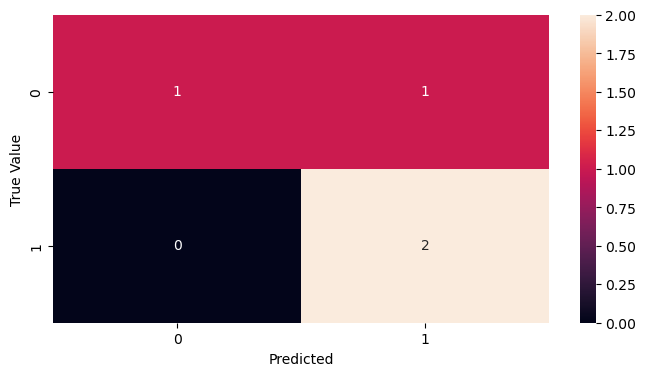

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
sn.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("True Value")